In [1]:
#importing libraries
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# import the regressor 
from sklearn.ensemble import RandomForestRegressor

from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [2]:
#reading data
data = pd.read_csv('./Shakespeare_data.csv')

In [3]:
#Replacing NaN value of Other
data['Player'].replace(np.nan, 'Other',inplace = True)
display(data)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,Player-Line
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111396 non-null object
Player-Line         111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


None

In [5]:
#Numbers of Plays
print("Number of plays are: " + str(data['Play'].nunique()))

Number of plays are: 36


In [6]:
#Play's Name
pd.DataFrame(data['Play'].unique().tolist(), columns=['Play Name'])

,Play Name
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


There are total 36 different plays in the CSV file and each plays have different number of players and each players have differnt number of lines.

So First, I'll find out the number of players in each Play and then number of lines of each plays.

,Num Players,Play
0,71,Richard III
1,65,Henry VI Part 2
2,62,Coriolanus
3,55,Timon of Athens
4,55,Antony and Cleopatra
5,53,Henry VI Part 1
6,51,Julius Caesar
7,48,Pericles
8,47,Henry V
9,47,Henry VIII


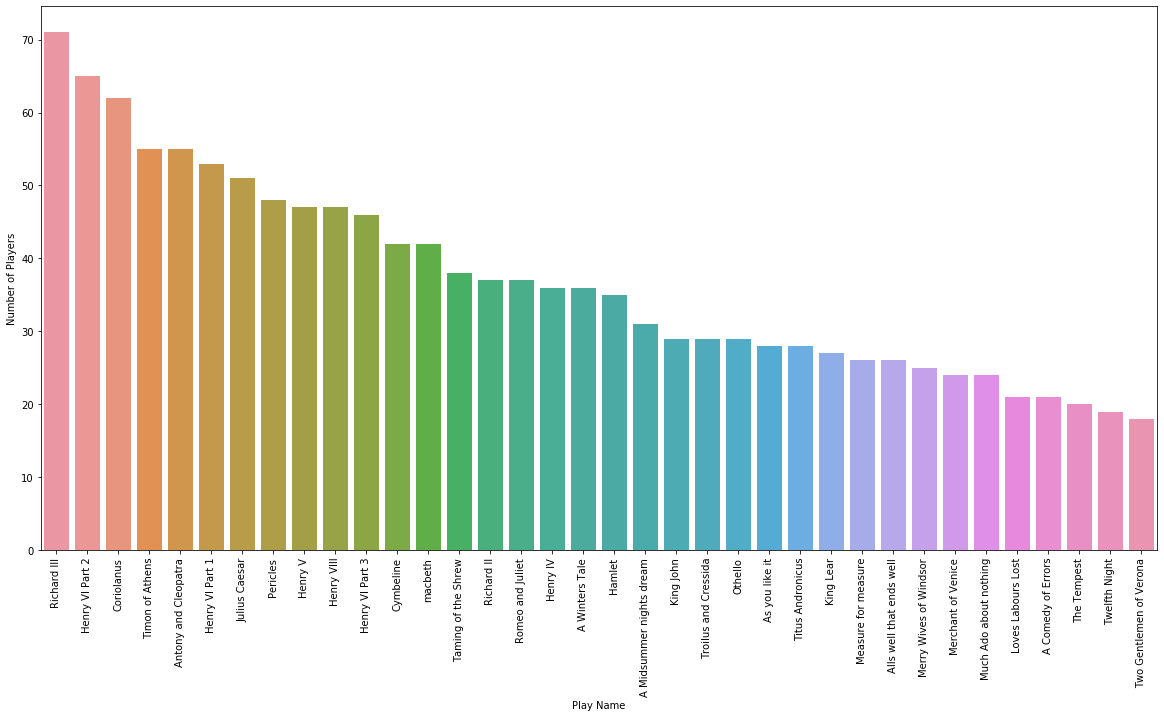

In [7]:
#This block will give Number of players in each Play
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
display(numberPlayers)

#plotting graph
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Play',y='Num Players',data=numberPlayers)
ax.set(ylabel='Number of Players', xlabel='Play Name')
plt.xticks(rotation=90)
plt.show()

As, we can see above that RichardIII has the maximum number of players i.e. 71.

Now, I'll find out the number of lines in each play.

In [8]:
#Total Number of Lines in each Play
play_data = data.groupby('Play').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
display(play_data)

,Lines,Play
0,4244,Hamlet
1,3992,Coriolanus
2,3958,Cymbeline
3,3941,Richard III
4,3862,Antony and Cleopatra
5,3766,King Lear
6,3762,Othello
7,3711,Troilus and Cressida
8,3489,A Winters Tale
9,3419,Henry VIII


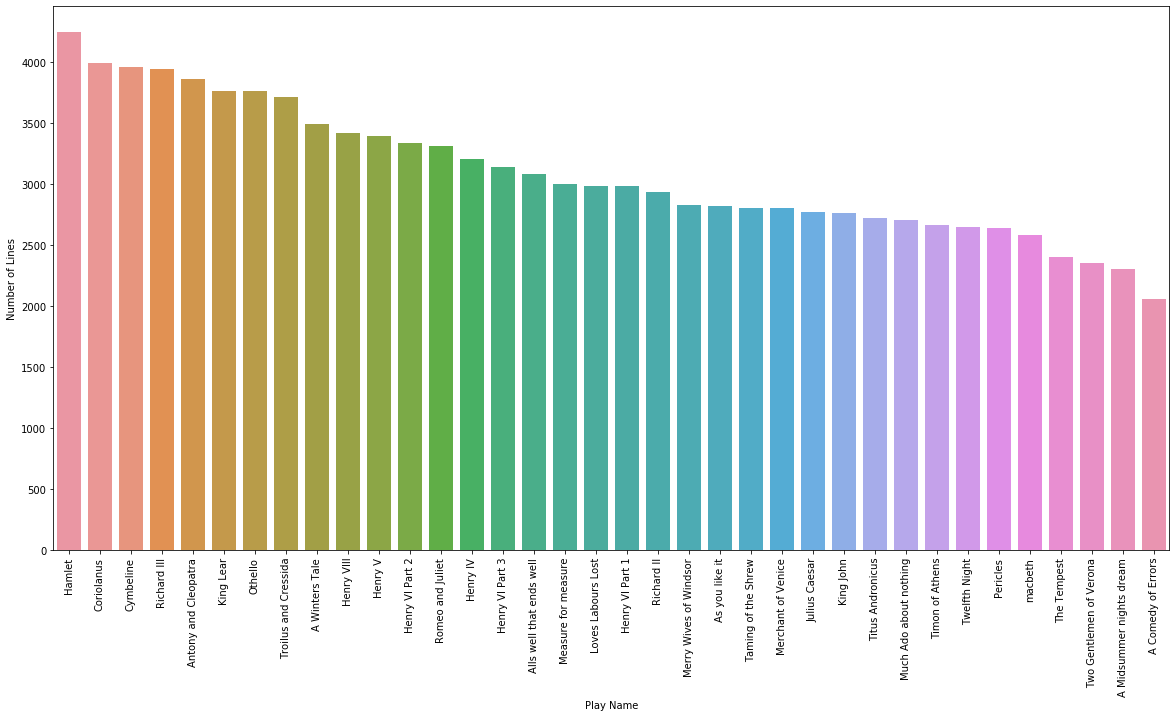

In [9]:
#Plotting graph for number of lines in each play
plt.figure(figsize=(20,10))
ax= sns.barplot(x='Play',y='Lines',data=play_data, order = play_data['Play'])
ax.set(ylabel='Number of Lines', xlabel='Play Name')
plt.xticks(rotation=90)
plt.show()


In [10]:
#unique play name list
play_name = data['Play'].unique().tolist()
display(play_name)

['Henry IV',
 'Henry VI Part 1',
 'Henry VI Part 2',
 'Henry VI Part 3',
 'Alls well that ends well',
 'As you like it',
 'Antony and Cleopatra',
 'A Comedy of Errors',
 'Coriolanus',
 'Cymbeline',
 'Hamlet',
 'Henry V',
 'Henry VIII',
 'King John',
 'Julius Caesar',
 'King Lear',
 'Loves Labours Lost',
 'macbeth',
 'Measure for measure',
 'Merchant of Venice',
 'Merry Wives of Windsor',
 'A Midsummer nights dream',
 'Much Ado about nothing',
 'Othello',
 'Pericles',
 'Richard II',
 'Richard III',
 'Romeo and Juliet',
 'Taming of the Shrew',
 'The Tempest',
 'Timon of Athens',
 'Titus Andronicus',
 'Troilus and Cressida',
 'Twelfth Night',
 'Two Gentlemen of Verona',
 'A Winters Tale']

Now, I'm going to analyze the lines of each players in each play to try to find out the positive , negative and neutral sentiments of the play.

In [11]:
sia = SIA()

plays_lines = data[['Play', 'Player-Line']]

play_sentiments ={}

for play in play_name:
    p = plays_lines[plays_lines['Play'] == play]['Player-Line']

    neg = 0
    pos = 0
    neu = 0

    for eachLine in p:
        sentiments = sia.polarity_scores(eachLine)    
        neg += sentiments['neg']
        pos += sentiments['pos']
        neu += sentiments['neu']
    
    len_p = 100/len(p)
    
    neg = round((neg * len_p) ,2)
    pos = round((pos * len_p) ,2)
    neu = round((neu * len_p) ,2)
    
    play_sentiments[play] = {'Negative': neg, 'Positive': pos, 'Neutral': neu}


In above code for each plays, I'm fetching all the lines and finding out the sentiments using nltk.sentiment. 

After that for each plays finding out the percentage of the sentiments. 

In [12]:
play_sentiments = pd.DataFrame(play_sentiments).transpose().reset_index()

play_sentiments.set_index("index", inplace = True)

display(play_sentiments)

,Negative,Positive,Neutral
index,,,
Henry IV,8.06,9.79,82.15
Henry VI Part 1,9.35,10.26,80.39
Henry VI Part 2,9.35,9.75,80.90
Henry VI Part 3,8.96,10.47,80.57
Alls well that ends well,6.84,12.76,80.41
As you like it,7.18,13.03,79.79
Antony and Cleopatra,6.81,10.99,82.20
A Comedy of Errors,8.25,7.45,84.29
Coriolanus,7.34,10.84,81.82


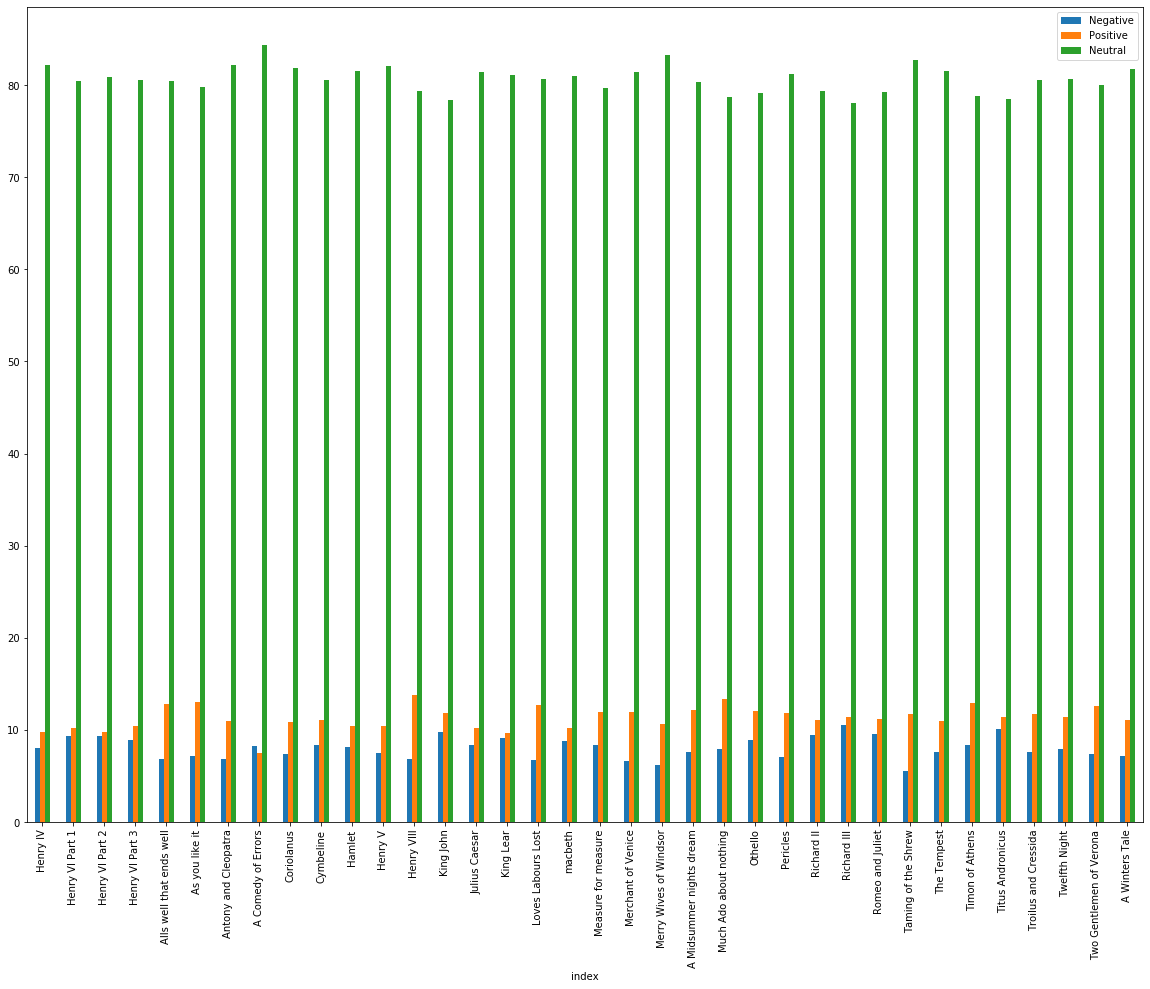

In [13]:
play_sentiments.plot(kind='bar', figsize=(20,15))

From the abve graph we can clearly see that all the play have more than 80% neutral statements and around 8% to 15% postive and negative statements.

Now, I'll compare number of lines of each players b/w two plays to comapre. and try to find out which character have the most number of lines or which is the main character in the play.

In [14]:
#Number of lines of each player
lines_per_player= data.groupby(['Play','Player']).count()['Player-Line']

lines_per_player= lines_per_player.to_frame()
display(lines_per_player)

Player-Line
Play               Player                       
A Comedy of Errors ADRIANA                   284
                   AEGEON                    150
                   AEMELIA                    75
                   ANGELO                     99
                   ANTIPHOLUS                  6
...                                          ...
macbeth            Son                        24
                   Third Apparition            6
                   Third Murderer              8
                   Third Witch                27
                   YOUNG SIWARD                8

[1328 rows x 1 columns]

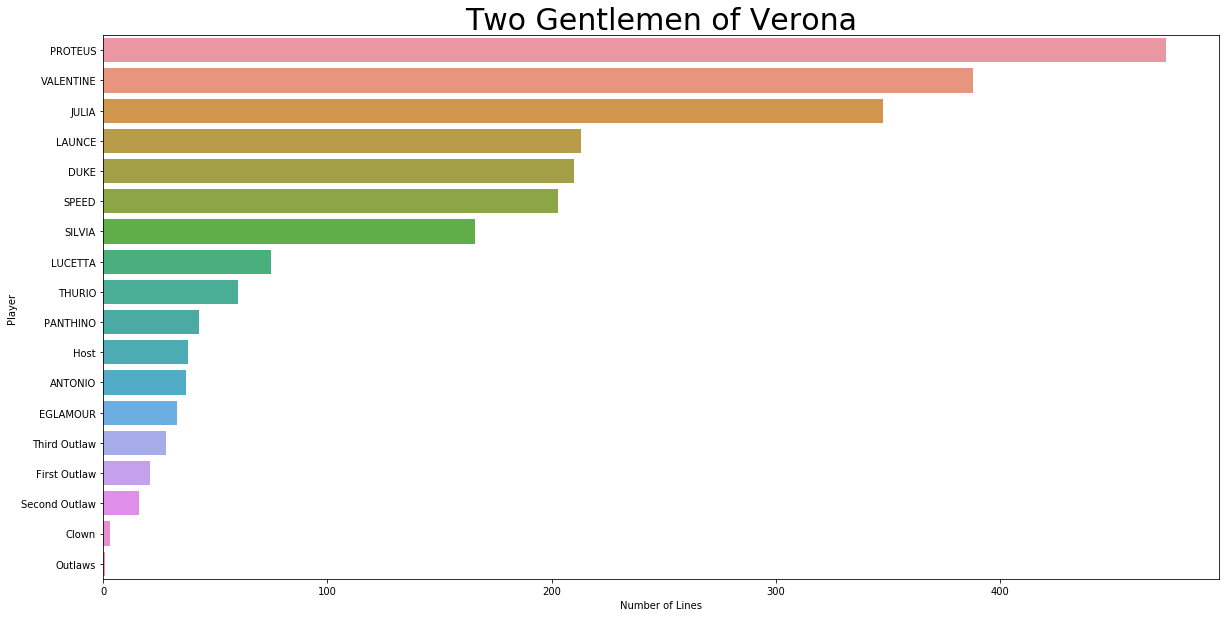

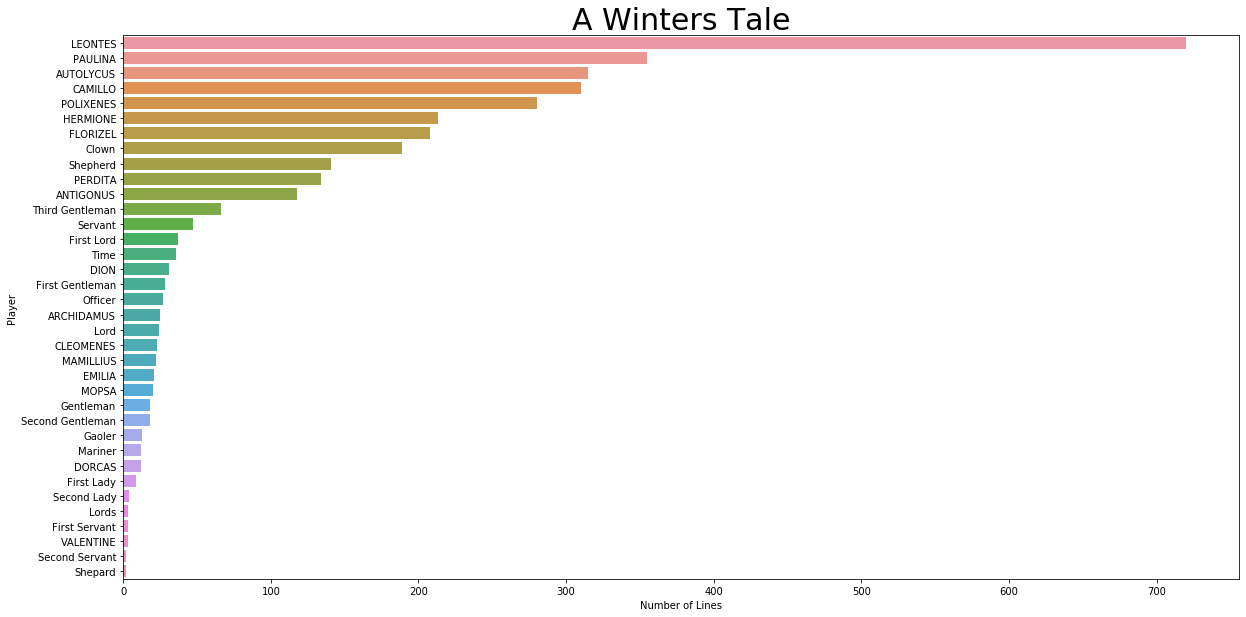

In [15]:
#comparing two plays by number of players and number of lines in a play

# for example taking two plays as follow
plays =  ['Two Gentlemen of Verona', 'A Winters Tale']

#plotting graph
for play in plays:
    p_line = data[data['Play']==play].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
    p_line = p_line.to_frame()
    p_line['Player'] = p_line.index.tolist()
    p_line.index = np.arange(0,len(p_line))
    p_line.columns=['Lines','Player']
    plt.figure(figsize=(20,10))
    ax= sns.barplot(x='Lines',y='Player',data=p_line)
    ax.set(xlabel='Number of Lines', ylabel='Player')
    plt.title(play,fontsize=30)
    plt.show()

Now, I'll compare number of lines nand number of players b/w two plays in pie chart to find out the percentage.

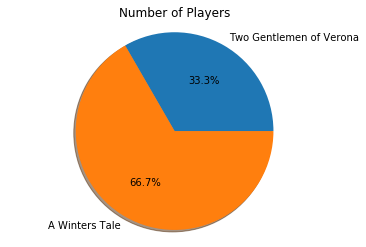

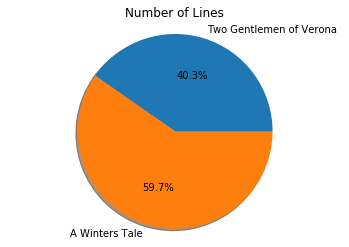

In [16]:
#play1 info
play1_info = data[data['Play']==plays[0]].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
play1_player = len(play1_info.index)
play1_lines = play1_info.sum()

#play2 info
play2_info = data[data['Play']==plays[1]].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
play2_player = len(play2_info.index)
play2_lines = play2_info.sum()


# pie chart of number of players
labels = [plays[0],plays[1]]
sizes = [play1_player, play2_player]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Number of Players')
plt.show()



# pie chart of number of lines
labels = [plays[0],plays[1]]
sizes = [play1_lines, play2_lines]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Number of Lines')
plt.show()

I want to create a network graph of each plays, contains payers name but the graph will be too congeted that's why I'm to create two grpah. First which show the plays name and then players name.

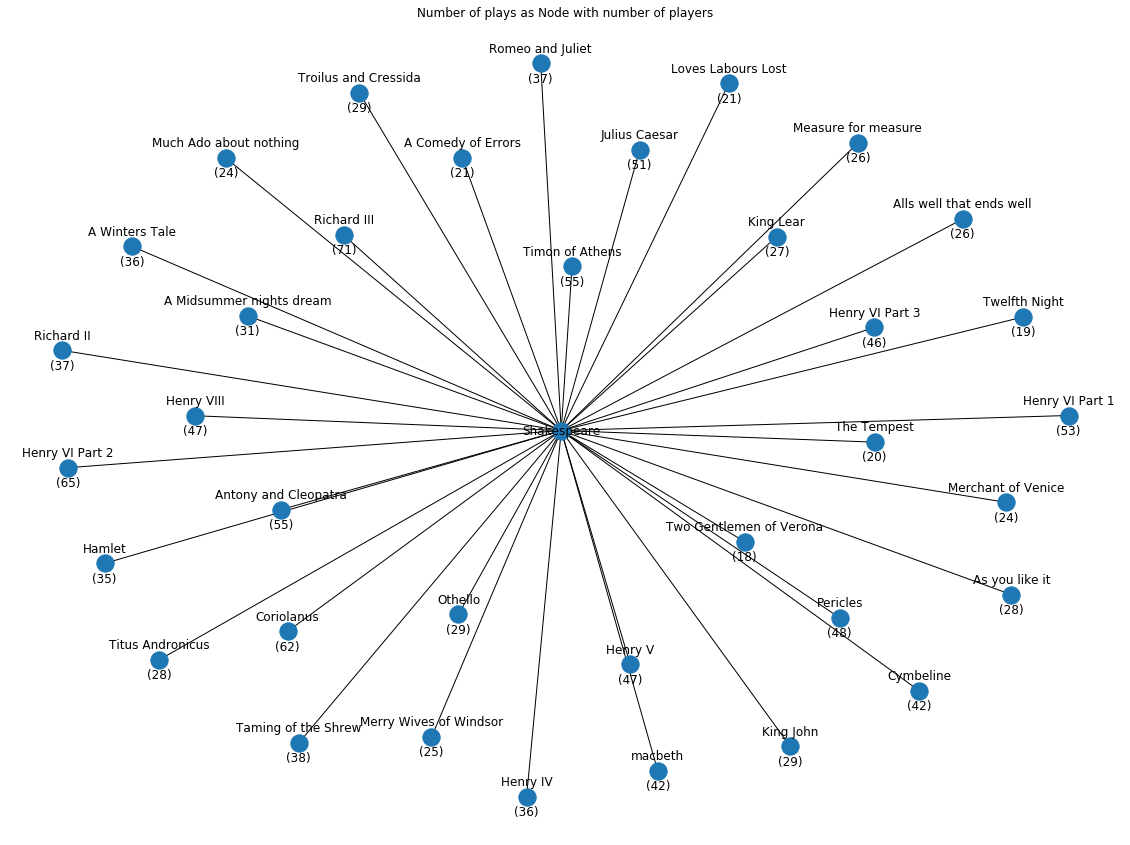

In [17]:
# importing networkx  
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

g = nx.Graph()

for p in play_name:
    n = int(numberPlayers[numberPlayers['Play'] == p]['Num Players'])
    g.add_edge('Shakespeare', p+'\n\n(' +str(n)+')')

# larger figure size
plt.figure(figsize=(20,15))
plt.title('Number of plays as Node with number of players')
nx.draw(g, with_labels = True)


Number of Player in King Lear is 27
Index(['KING LEAR', 'EDGAR', 'KENT', 'GLOUCESTER', 'EDMUND', 'Fool', 'GONERIL',
       'REGAN', 'ALBANY', 'CORNWALL', 'CORDELIA', 'Gentleman', 'OSWALD',
       'KING OF FRANCE', 'Messenger', 'Doctor', 'Herald', 'Knight', 'BURGUNDY',
       'Old Man', 'First Servant', 'CURAN', 'Captain', 'Third Servant', 'LEAR',
       'Second Servant', 'OCTAVIUS'],
      dtype='object', name='Player')


C:\Users\dhirkkum\Anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


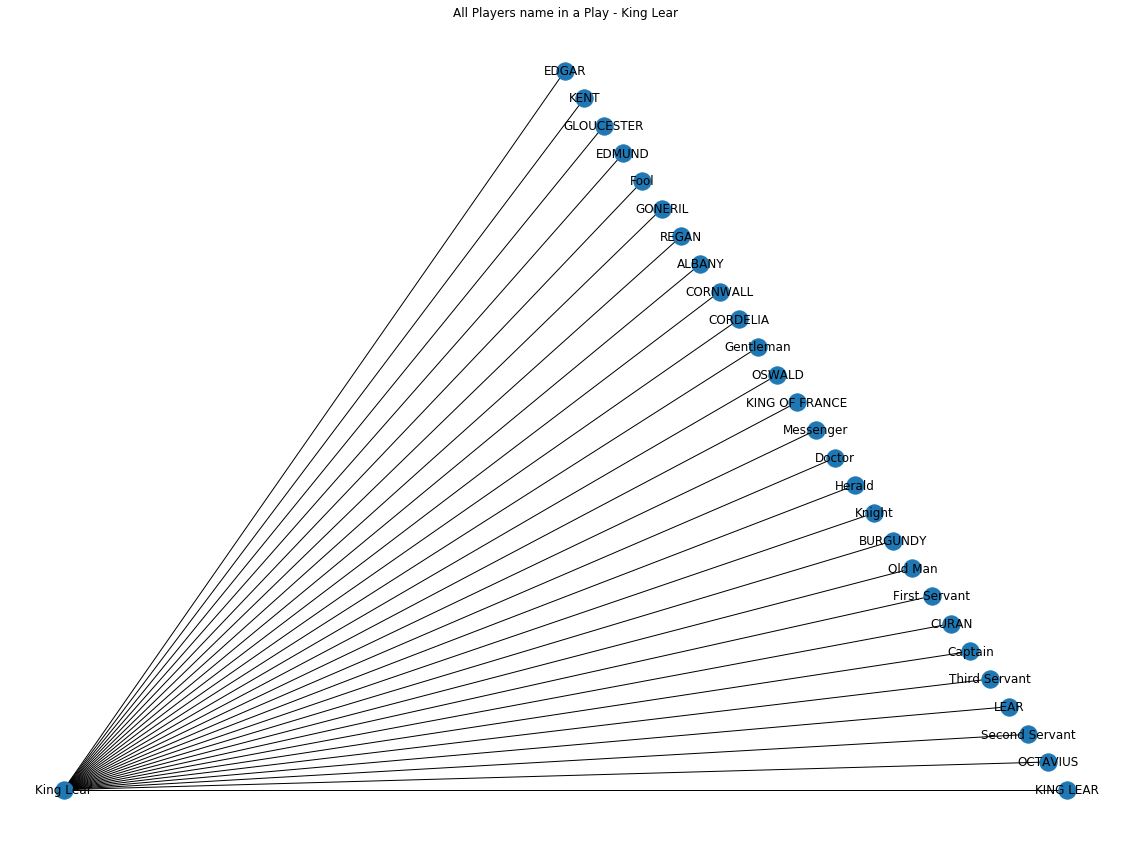

In [18]:
    
#name of players in a play in a tree format
play = 'King Lear'
p_line = data[data['Play']==play].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']

print('Number of Player in', play, 'is',len(p_line.index))
print(p_line.index)

g = nx.Graph()

for p in p_line.index:
    g.add_edge(play, p)

# larger figure size
plt.figure(figsize=(20,15))
plt.title('All Players name in a Play - ' + play)
nx.draw_planar(g, with_labels = True)


As we can see the King Lear different characters.

---
Now, I'll make classification model on the data which helps to identifying which of a set of categories a new observation belongs.

In [19]:
data_model = numberPlayers

data_model = data_model.join(play_data.set_index('Play'), on='Play')

display(data_model)

,Num Players,Play,Lines
0,71,Richard III,3941
1,65,Henry VI Part 2,3334
2,62,Coriolanus,3992
3,55,Timon of Athens,2662
4,55,Antony and Cleopatra,3862
5,53,Henry VI Part 1,2983
6,51,Julius Caesar,2771
7,48,Pericles,2641
8,47,Henry V,3395
9,47,Henry VIII,3419


I've created a dataset which contains plays name, number of players in it and the total number of lines in the play.

Now, applying Random Forest Regressor on the above dataset.

In [23]:
x_value= []
for d in data_model['Num Players'].values:
    x_value.append([d])

x= np.array(x_value)
print(x)

y = data_model['Lines'].values # test the output by changing values 
print(y)

[[71]
 [65]
 [62]
 [55]
 [55]
 [53]
 [51]
 [48]
 [47]
 [47]
 [46]
 [42]
 [42]
 [38]
 [37]
 [37]
 [36]
 [36]
 [35]
 [31]
 [29]
 [29]
 [29]
 [28]
 [28]
 [27]
 [26]
 [26]
 [25]
 [24]
 [24]
 [21]
 [21]
 [20]
 [19]
 [18]]
[3941 3334 3992 2662 3862 2983 2771 2641 3395 3419 3138 3958 2586 2806
 2937 3313 3205 3489 4244 2300 2766 3711 3762 2822 2726 3766 2998 3083
 2831 2802 2704 2986 2055 2403 2648 2357]


In [24]:
# Fitting Random Forest Regression to the dataset 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(x, y) 


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Now arange for creating a range of values from min value of x to max value of x with a difference of 0.01 between two consecutive values 

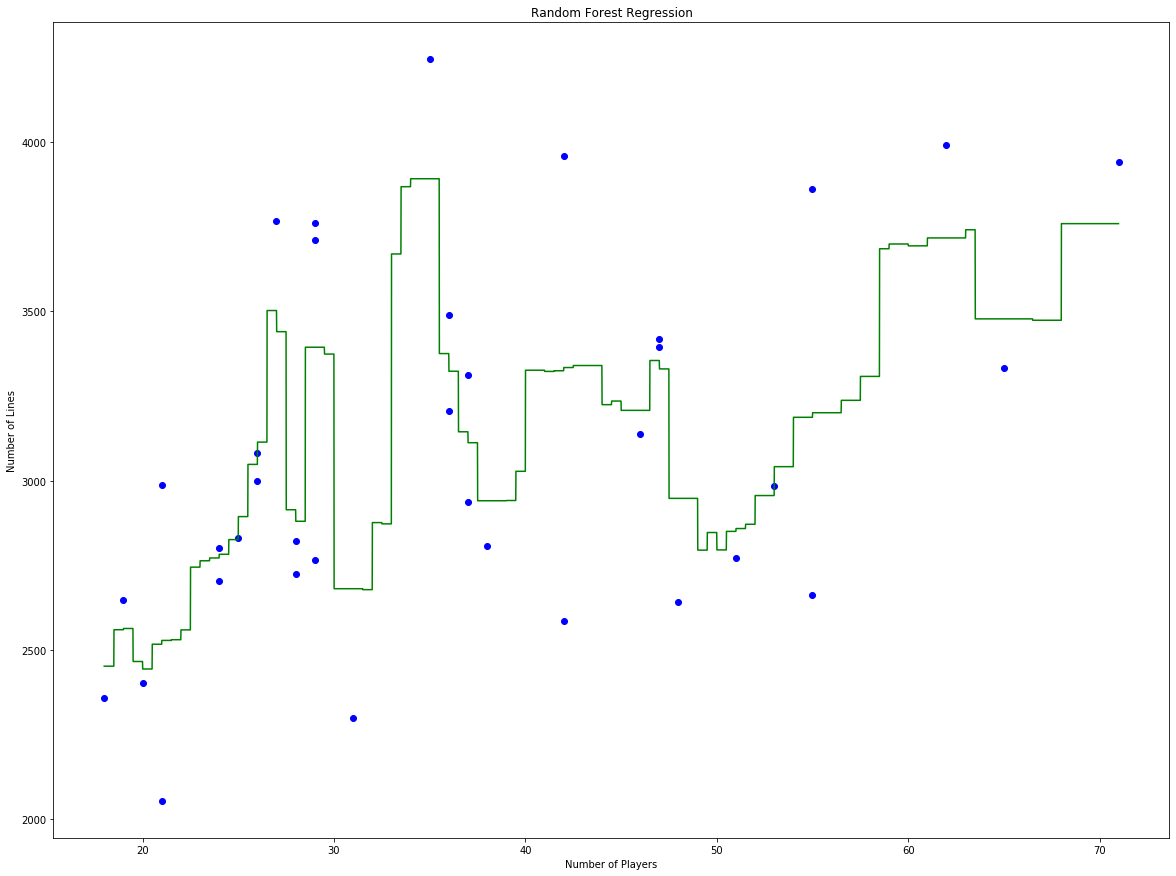

In [25]:
X_grid = np.arange(min(x), max(x), 0.01)  

# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 

plt.figure(figsize=(20,15))
# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Number of Players') 
plt.ylabel('Number of Lines') 
plt.show()


Visualising the Random Forest Regression results.

---
#### Summary of what I did in this Project.

* After reading all data from CSV, I have dropped NaN value for Other
* Fetched total number of plays and unique play name
* Fetched total number of players(characters) in each play and unique player name in each play
* Visualized the data in bar plot of above data
* Fetched total number of lines in each play
* Group total number of lines of each players in each play
* Visualize the above data in bar plot
* Group the lines according to different plays and passes the line in sentimental alayzer to find out the whole sentiments of a play.
* For each play found out the Positive, Negative, and Neutral percentage and plotted a graph.
* Comparing two plays by the number of players and number of lines in the play
* Visualized the abopve data in Pie Chart
* Visualized the Number of Players in each Play in Tree Graph
* Visualized the players name in a play in tree planar graph
* Grouped a dataset of plays name, number of players and number of lines to apply Random Forest Regressor on the dataset.
* Aranged for creating a range of values from min value of x to max value of x with a difference of 0.01 between two consecutive values.
* Finally, visualizing the results.